# Part a

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
ai = 0.7
ao = 0.289
to = 293
ti = 260
def albedo(t):
    if t <= ti:
        return ai
    elif ti < t < to:
        return ao + (ai - ao) * ((t-to)**2/(ti-to)**2)
    elif t >= to:
        return ao

In [3]:
temp_range = np.linspace(250,300,100)
results = []
for t in temp_range:
    results.append(albedo(t))

Text(0.5, 1.0, 'Albedo Value as a Function of Global Mean Temperature of a Planet')

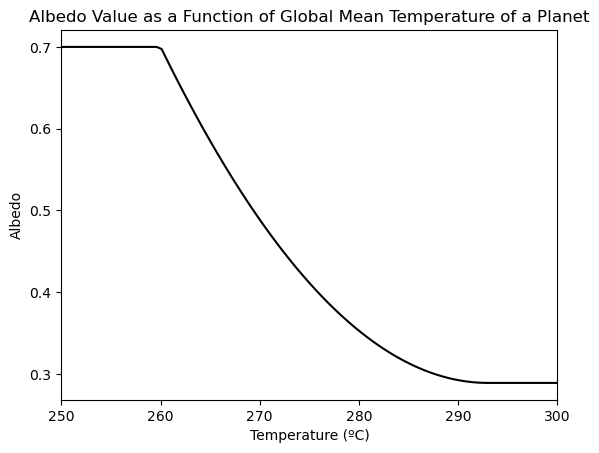

In [4]:
fig, ax = plt.subplots()
ax.margins(x = 0)
ax.plot(temp_range,results, 'k-')
ax.set_xlabel('Temperature (ºC)')
ax.set_ylabel('Albedo')
ax.set_title("Albedo Value as a Function of Global Mean Temperature of a Planet")

# Part b

In [143]:
solarconst = 1366
stefboltz = 5.67e-8
heatcap = 4.0e8 
epsilon= 0.80
u0 = (242.4,288.274)
t0 = 0

In [144]:
def surface_temp(t,u):
    f = np.zeros((2))
    f[0] = (solarconst * (1-albedo(u[1]))/4 - epsilon * stefboltz * (u[0]**4) - (1-epsilon) * stefboltz * (u[1]**4))/heatcap
    f[1] = (solarconst * (1-albedo(u[1]))/4 + epsilon * stefboltz * (u[0]**4) - stefboltz * (u[1]**4)) / heatcap
    return f


In [145]:
Dt = 60*60*365*24
tmax = 100*Dt
t = np.arange(t0, tmax, Dt)

In [146]:
sol = solve_ivp(surface_temp, [t0, tmax], u0, method='RK45', t_eval=t)

In [147]:
T_eq = sol.y[1,-1] 
warming = T_eq - 288.274

print("The average updated temperature of the surface after addition of CO_2 is %0.4f Kelvin or %0.4f deg C. The amount of warming is %0.4f degrees." % 
      (T_eq, T_eq - 273.15, warming))

The average updated temperature of the surface after addition of CO_2 is 290.3686 Kelvin or 17.2186 deg C. The amount of warming is 2.0946 degrees.
